In [1]:
from math import log
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib.patches import Rectangle

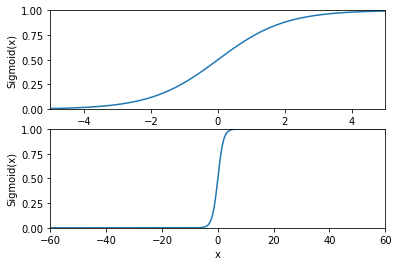

In [2]:
t = np.arange(-60.0, 60.3, 0.1)
s = 1/(1 + np.exp(-t))
ax = plt.subplot(211)
ax.plot(t,s)
ax.axis([-5,5,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
ax = plt.subplot(212)
ax.plot(t,s)
ax.axis([-60,60,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.show()

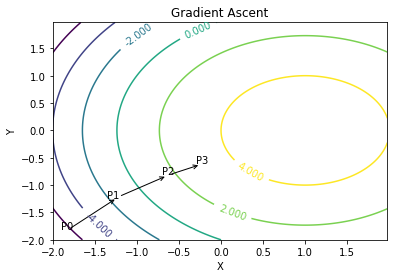

In [3]:
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = -((X-1)**2)
Z2 = -(Y**2)
#Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 1.0 * (Z2 + Z1)+5.0

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z) # 登高线
plt.annotate('', xy=(0.05, 0.05),  xycoords='axes fraction',
             xytext=(0.2,0.2), textcoords='axes fraction',
             va="center", ha="center", bbox=leafNode, arrowprops=arrow_args )
plt.text(-1.9, -1.8, 'P0')
plt.annotate('', xy=(0.2,0.2),  xycoords='axes fraction',
             xytext=(0.35,0.3), textcoords='axes fraction',
             va="center", ha="center", bbox=leafNode, arrowprops=arrow_args )
plt.text(-1.35, -1.23, 'P1')
plt.annotate('', xy=(0.35,0.3),  xycoords='axes fraction',
             xytext=(0.45,0.35), textcoords='axes fraction',
             va="center", ha="center", bbox=leafNode, arrowprops=arrow_args )
plt.text(-0.7, -0.8, 'P2')
plt.text(-0.3, -0.6, 'P3')
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Gradient Ascent')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
def loadDataSet():
    dataMat = []; 
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([float(1.0), float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [5]:
dataMat,labelMat = loadDataSet()

In [6]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [7]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 5000
    weights = np.ones((n,1))
    minE = m * 0.1 # 如果误差足够小就停止
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        # error就是 戴尔塔 f(x,y)
        error = (labelMat - h) 
        totalError = sum(abs(error))        
        #vector subtraction
        if totalError < minE : 
            print(k, totalError)
            break;
        # dataMatrix.transpose()* error 
        # 这个公式对应周志华 机器学习中的 公式 3.10 T(X)(X*W-y)
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [8]:
weights = gradAscent(dataMat,labelMat)
weights = np.transpose(weights).tolist()[0]
weights

1756 [[9.99964225]]


[6.683384602265325, 0.6796061483803119, -0.9427976563755633]

In [9]:
def plotBestFit(weights):
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); 
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); 
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.8, 3.2, 0.4)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()


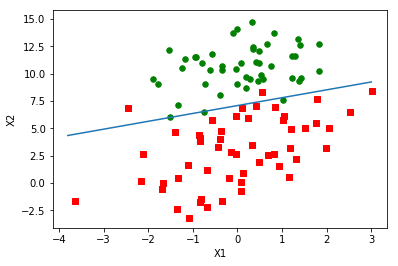

In [10]:
plotBestFit(weights)

In [11]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * np.array(dataMatrix[i]) 
    return weights

In [12]:
weights0 = stocGradAscent0(dataMat,labelMat)
weights0

array([ 1.01702007,  0.85914348, -0.36579921])

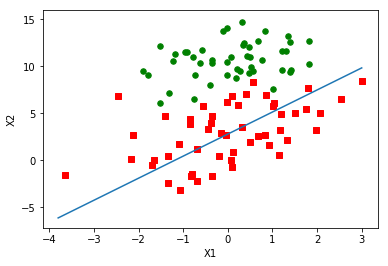

In [13]:
plotBestFit(weights0)

In [14]:
def stocGradAscentHist0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    weightsHistory=np.zeros((200*m,n))
    for j in range(200):
        for i in range(m):
            h = sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights +  alpha * error * np.array(dataMatrix[i]) 
            weightsHistory[j*m + i,:] = weights
    return weightsHistory

In [15]:
myHist = stocGradAscentHist0(dataMat,labelMat)

In [16]:
def plotBestFitmyHist(myHist):
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []    
    markers =[]
    colors =[]
    fig = plt.figure()
    ax = fig.add_subplot(311)
    type1 = ax.plot(myHist[:,0])
    plt.ylabel('X0')
    ax = fig.add_subplot(312)
    type1 = ax.plot(myHist[:,1])
    plt.ylabel('X1')
    ax = fig.add_subplot(313)
    type1 = ax.plot(myHist[:,2])
    plt.xlabel('iteration')
    plt.ylabel('X2')
    plt.show()

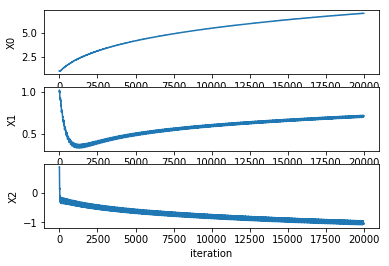

In [17]:
plotBestFitmyHist(myHist)

In [18]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # 添加 *m 使 alpha 单调递减
            alpha = 4/(1.0+j*m+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(np.random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * np.array(dataMatrix[randIndex]) 
            del(dataIndex[randIndex])
    return weights

In [19]:
weights1 = stocGradAscent1(dataMat,labelMat,20)
weights1

array([ 4.35722122,  0.03285989, -0.63812978])

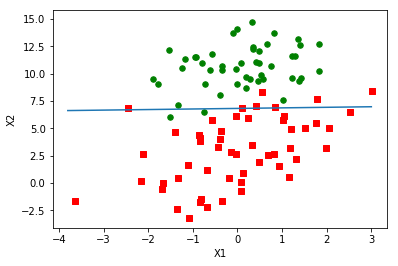

In [20]:
plotBestFit(weights1)

In [21]:
def stocGradAscent1Hist(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    weightsHistory=np.zeros((numIter*m,n))
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # 添加 *m 使 alpha 单调递减
            alpha = 4/(1.0+j*m+i)+0.0001
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            #print error
            weights = weights + alpha * error * np.array(dataMatrix[randIndex]) 
            weightsHistory[j*m + i,:] = weights
            del(dataIndex[randIndex])
    print(weights)
    return weightsHistory

In [22]:
myHist1 = stocGradAscent1Hist(dataMat,labelMat,15)

[ 6.87420116  2.91978641 -0.93543437]


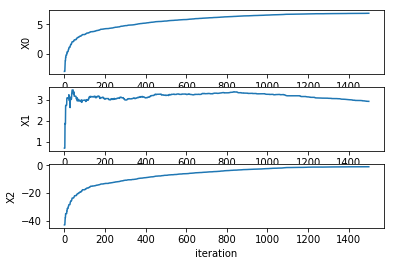

In [23]:
plotBestFitmyHist(myHist1)

In [24]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [25]:
def colicTest():
    frTrain = open('horseColicTraining.txt'); 
    frTest = open('horseColicTest.txt')
    trainingSet = []; 
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; 
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

In [26]:
colicTest()

the error rate of this test is: 0.358209


0.3582089552238806

In [27]:
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [28]:
multiTest()

the error rate of this test is: 0.313433
the error rate of this test is: 0.298507
the error rate of this test is: 0.253731
the error rate of this test is: 0.328358
the error rate of this test is: 0.388060
the error rate of this test is: 0.402985
the error rate of this test is: 0.388060
the error rate of this test is: 0.268657
the error rate of this test is: 0.298507
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.322388
